In [23]:
import json
import pathlib
import collections

import pandas as pd
from matplotlib import pyplot as plt

pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [24]:
path = pathlib.Path("../data/statistics.json")
with open(path, "r", encoding="utf-8") as file:
    stats = json.load(file)

In [25]:
print("num databases:", len(stats["num_tables"]))
ss = []
for key in ("num_tables", "num_cols", "num_rows", "sparsities", "num_numerical", "num_non_numerical"):
    s = pd.Series(stats[key], name=key).describe()
    s["sum"] = sum(stats[key])
    del s["count"]
    ss.append(s)
pd.concat(ss, axis=1)

num databases: 100000


,num_tables,num_cols,num_rows,sparsities,num_numerical,num_non_numerical
mean,16.11,52.72,118.16,0.23,12.97,39.76
std,27.55,70.38,1712.89,0.11,22.90,47.96
min,2.00,2.00,1.00,0.00,0.00,1.00
25%,2.00,15.00,20.00,0.15,1.00,13.00
50%,3.00,24.00,41.00,0.22,4.00,20.00
75%,8.00,55.00,87.00,0.29,14.00,41.00
max,100.00,391.00,840733.00,0.95,134.00,262.00
sum,1610907.00,84932333.00,190339182.00,367133.43,20886236.00,64046097.00


In [26]:
print(len(list(filter(lambda x: x > 100000, stats["num_rows"]))))
print(len(list(filter(lambda x: x == 100, stats["num_tables"]))))
print(len(list(filter(lambda x: x > 100, stats["num_tables"]))))
print(len(list(filter(lambda x: x > 0.5, stats["sparsities"]))) / len(stats["sparsities"]))

50
2831
0
0.02267976984394506


In [27]:
print("num unique table names:", len(stats["tab_names"].keys()))
print("num unique column names:", len(stats["col_names"].keys()))
print("num unique alt 0 table names:", len(stats["alt_0_tab_names"].keys()))
print("num unique alt 0 column names:", len(stats["alt_0_col_names"].keys()))
print("num unique alt 1 table names:", len(stats["alt_1_tab_names"].keys()))
print("num unique alt 1 column names:", len(stats["alt_1_col_names"].keys()))

num unique table names: 290297
num unique column names: 171738
num unique alt 0 table names: 261710
num unique alt 0 column names: 106471
num unique alt 1 table names: 100152
num unique alt 1 column names: 6257


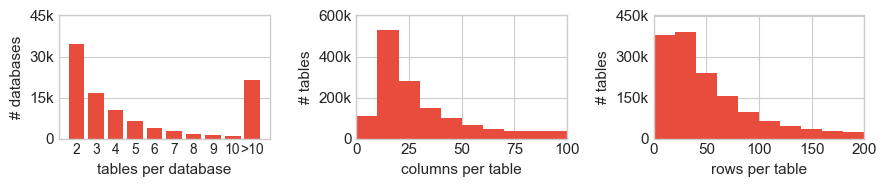

<Figure size 900x200 with 0 Axes>

In [30]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (9, 2)
plt.rcParams["font.size"] = 11
plt.rcParams["hatch.linewidth"] = 0.45
figure, (tabs, cols, rows) = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False)
figure.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.7)

MAX_TAB_COUNT = 10
tab_count = collections.Counter(stats["num_tables"])
tab_list = list(map(lambda x: (str(x[0]), x[1]), filter(lambda x: x[0] <= MAX_TAB_COUNT, sorted(tab_count.items())))) + [(f">{MAX_TAB_COUNT}", sum(map(lambda x: x[1], filter(lambda x: x[0] > MAX_TAB_COUNT, tab_count.items()))))]

x_lab, y = zip(*tab_list)
x = list(range(len(x_lab)))
tabs.bar(x, y, color="#e74c3c")
tabs.set_xlabel("tables per database")
tabs.set_xticks(x, labels=x_lab, fontsize=10)
tabs.set_ylabel("# databases")
tabs.set_yticks((0, 15000, 30000, 45000), labels=("0", "15k", "30k", "45k"))
tabs.set_ylim((0, 45000))
tabs.xaxis.grid(False)

cols.hist(stats["num_cols"], bins=list(range(0, 101, 10)), color="#e74c3c")
cols.set_xlabel("columns per table")
cols.set_xticks((0, 25, 50, 75, 100), labels=("0", "25", "50", "75", "100"))
cols.set_xlim((0, 100))
cols.set_ylabel("# tables")
cols.set_yticks((0, 200000, 400000, 600000), labels=("0", "200k", "400k", "600k"))
cols.set_ylim((0, 600000))

rows.hist(stats["num_rows"], bins=list(range(0, 201, 20)), color="#e74c3c")
rows.set_xlabel("rows per table")
rows.set_xticks((0, 50, 100, 150, 200), labels=("0", "50", "100", "150", "200"))
rows.set_xlim((0, 200))
rows.set_ylabel("# tables")
rows.set_yticks((0, 150000, 300000, 450000), labels=("0", "150k", "300k", "450k"))
rows.set_ylim((0, 450000))

figure.tight_layout(h_pad=2.5)
plt.savefig("../data/dimensions.pdf", bbox_inches="tight")
plt.show()
plt.clf()

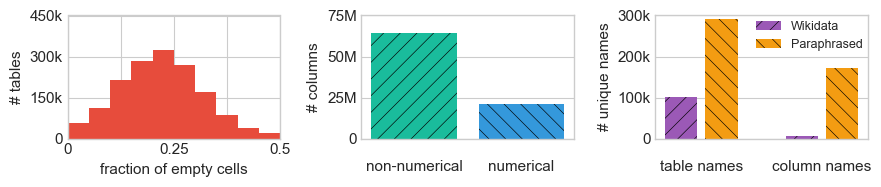

<Figure size 900x200 with 0 Axes>

In [32]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (9, 2)
plt.rcParams["font.size"] = 11
plt.rcParams["hatch.linewidth"] = 0.45
figure, (sparsity, dtypes, cnames) = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False)
figure.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.7)

sparsity.hist(stats["sparsities"], bins=list(x / 20 for x in range(0, 11, 1)), color="#e74c3c")
sparsity.set_xlabel("fraction of empty cells")
sparsity.set_xticks((0, 0.125, 0.25, 0.375, 0.5), labels=("0", "", "0.25", "", "0.5"))
sparsity.set_xlim((0, 0.5))
sparsity.set_ylabel("# tables")
sparsity.set_yticks((0, 150000, 300000, 450000), labels=("0", "150k", "300k", "450k"))
sparsity.set_ylim((0, 450000))

dtypes.bar([0, 1], [sum(stats["num_non_numerical"]), sum(stats["num_numerical"])], color=["#1abc9c", "#3498db"], hatch=["//", "\\\\"])
dtypes.set_xticks([0, 1], labels=("non-numerical", "numerical"))
dtypes.set_ylabel("# columns")
dtypes.set_yticks((0, 25000000, 50000000, 75000000), labels=("0", "25M", "50M", "75M"))
dtypes.set_ylim((0, 75000000))
dtypes.xaxis.grid(False)

cnames.bar([0, 3], [len(stats["alt_1_tab_names"].keys()), len(stats["alt_1_col_names"].keys())], color="#9b59b6", label="Wikidata", hatch="//")
cnames.bar([1, 4], [len(stats["tab_names"].keys()), len(stats["col_names"].keys())], color="#f39c12", label="Paraphrased", hatch="\\\\")
cnames.set_xticks([0.5, 3.5], labels=("table names", "column names"))
cnames.set_ylabel("# unique names")
cnames.set_yticks((0, 100000, 200000, 300000), labels=("0", "100k", "200k", "300k"))
cnames.set_ylim((0, 300000))
cnames.xaxis.grid(False)
cnames.legend(loc="upper right", borderpad=-0.1, prop={"size": 9})

figure.tight_layout(h_pad=2.5)
plt.savefig("../data/characteristics.pdf", bbox_inches="tight")
plt.show()
plt.clf()